In [2]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
dataset_train =pd.read_csv(r"C:\Users\Omkar\Downloads\Google_Stock_Price_Train.csv")

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set = dataset_train.iloc[:,1:2].values

In [7]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [8]:
print(training_set.shape)

(1258, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [15]:
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

#Creating X_train and y_train Data Structures.

In [16]:
X_train =[]
y_train =[]
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [17]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


#Reshape the Data.

In [18]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [19]:
X_train.shape

(1198, 60, 1)

#Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.

In [21]:
from tensorflow.keras import Sequential

In [23]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units =50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units =50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units =50)) 
regressor.add(Dropout (0.2))

regressor.add(Dense (units=1))

#Fitting the Model.

In [27]:
regressor.compile(optimizer = "adam",loss = "mean_squared_error")
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 21s 167ms/step - loss: 0.0392
Epoch 2/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0043
Epoch 13/100

In [28]:
dataset_test = pd.read_csv(r"C:\Users\Omkar\Downloads\Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

#Preparing the Input for the Model.

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1) 
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

#Predicting the Values for Jan 2017 Stock Prices

In [36]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


#Plotting the Actual and Predicted Prices for Google Stocks

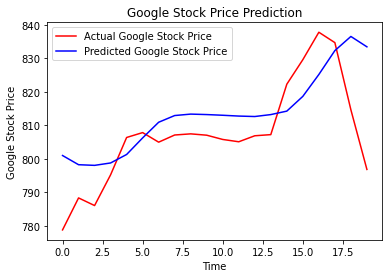

In [38]:
plt.plot(actual_stock_price,color = 'red',label = "Actual Google Stock Price")
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

#As you can see above, the model can predict the trend of the actual stock prices very closely. The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.

#The stock market plays a remarkable role in our daily lives. It is a significant factor in a country's GDP growth. In this tutorial, you learned the basics of the stock market and how to perform stock price prediction using machine learning